In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as pof
import scipy.stats as sps
sns.set()

plt.rc('font', size=30)
plt.rc('axes', titlesize=30)
plt.rc('axes', labelsize=30)
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)
plt.rc('legend', fontsize=30)
plt.rc('figure', titlesize=30)

from sklearn.base import BaseEstimator
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.covariance import MinCovDet
import cvxpy as cvx
import yfinance as yf
from tqdm import tqdm

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit
from warnings import filterwarnings
filterwarnings('default')

C:\Users\poloz\anaconda3\envs\MIPT\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\poloz\anaconda3\envs\MIPT\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [166]:
%run new_portfolio_optimizer.ipynb
%run helper_functions.ipynb

C:\Users\poloz\anaconda3\envs\MIPT\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\poloz\anaconda3\envs\MIPT\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



Считаем скачанные данные.

In [146]:
data_opened = pd.read_csv('actions yahoo.csv')
data_opened = data_opened.set_index('Date')
data_opened

,AAPL,BAC,T,MO,AA,AXP,DD,ABT,AMAT,AMGN,...,GFRD.L,CWK.L,TSCO.L,TRY.L,TPK.L,SXS.L,REL.L,RE.L,PZC.L,PRV.L
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1990-01-03,0.006710,0.008044,-0.017374,0.014620,0.014875,0.010752,0.018708,0.003610,-0.025639,0.024271,...,0.038455,0.000000,-0.010151,0.018349,0.029941,0.050251,0.004484,0.004405,0.014925,-0.014492
1990-01-04,0.003336,-0.021277,-0.011513,-0.034582,0.001629,-0.010638,-0.016695,-0.001799,-0.013159,0.018958,...,0.000000,0.000000,0.010256,-0.009009,0.046511,0.000000,0.031248,0.000000,0.000000,0.000000
1990-01-05,0.003323,-0.021739,-0.048192,0.005970,-0.009756,-0.010753,-0.005093,-0.010811,-0.013333,0.013953,...,0.012349,0.000000,0.010152,-0.009091,0.000000,0.000000,-0.008656,0.000000,0.000000,0.029412
1990-01-08,0.006621,0.005555,0.016877,-0.026706,0.000000,-0.007246,-0.005120,0.005126,-0.018019,-0.002293,...,0.000000,0.000000,-0.010050,-0.009174,0.000000,0.000000,-0.006551,0.000000,0.000000,-0.028572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,0.003644,0.003162,0.003632,-0.003840,0.000843,0.010587,0.020000,0.001223,0.020811,0.010202,...,0.025824,-0.007467,0.002782,0.014614,0.003508,0.011025,0.001265,0.053942,0.007216,0.027496
2021-12-27,0.022975,0.004953,-0.003619,0.001927,0.007918,0.001218,0.016170,0.016528,0.046498,0.006167,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-12-28,-0.005767,0.001344,0.001614,0.012610,-0.010697,0.000122,0.008019,-0.006998,-0.018928,0.002665,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Разделим на трейн и тест.

In [147]:
data_train = data_opened[data_opened.index < '2017-01-01']
data_test = data_opened[data_opened.index >= '2017-01-01']

Поработаем с выбросами на трейне и уберем те же колонки на тесте.

In [148]:
idx = (data_train.max(axis=0) < 0.6).index[data_train.max(axis=0) < 0.6] & \
      (data_train.min(axis=0) > -0.6).index[data_train.min(axis=0) > -0.6]
idx

Index(['AAPL', 'BAC', 'T', 'MO', 'AA', 'AXP', 'DD', 'ABT', 'AMAT', 'AMGN',
       ...
       'RTN.L', 'PSON.L', 'IMI.L', 'GFRD.L', 'CWK.L', 'TSCO.L', 'TPK.L',
       'SXS.L', 'REL.L', 'PRV.L'],
      dtype='object', length=811)

C:\Users\poloz\anaconda3\envs\MIPT\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

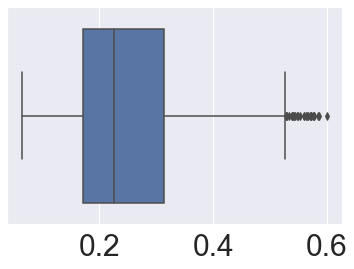

In [149]:
sns.boxplot(data_train[idx].max(axis=0))

C:\Users\poloz\anaconda3\envs\MIPT\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

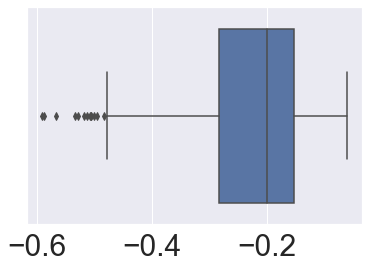

In [150]:
sns.boxplot(data_train[idx].min(axis=0))

In [151]:
data_train = data_train[idx]

In [152]:
data_test = data_test[idx]

Найдем оптимальные значения параметров с помощью `RandomizedSearchCV`.

Без оптимизаций матрицы ковариаций.

In [153]:
po = NewPortfolioOptimizer()
po.get_params()

{'R': 0.002,
 'R_quantille': None,
 'VAR_quantile': 0.05,
 'kernel': 'poly',
 'kernelcoef0': 1,
 'kerneldegree': 3,
 'kernelgamma': None,
 'kernelparams': None,
 'method': None,
 'metric': 'sharp',
 'n_components': 1,
 'n_top_companies': 20,
 'period_change_portfolio': 360,
 'risk_free_value': 1,
 'size_of_window': None,
 'smooth_function': None,
 'threshold': 1e-05,
 'verbosity': False}

In [154]:
sps.beta(a=10, b=3).rvs(10)

array([0.8153155 , 0.86934659, 0.58456715, 0.64917658, 0.83310975,
       0.55208114, 0.82811726, 0.64004608, 0.85768304, 0.80514091])

In [155]:
tscv = TimeSeriesSplit(n_splits=4, test_size=1260)

In [285]:
param_grid = {
    'size_of_window': [None] * 20 + np.linspace(200, 1800, 321, dtype=int).tolist(),
    'n_top_companies': np.linspace(1, 100, 100, dtype=int).tolist(),
    'period_change_portfolio': [None, 120, 240, 360, 480, 720, 900],
    'R_quantille': sps.beta(a=20, b=1)
}

In [286]:
po_randomsearch = RandomizedSearchCV(
    estimator=NewPortfolioOptimizer(risk_free_value=2e-4 + 1), 
    param_distributions=param_grid,
    cv=tscv,
    verbose=0,
    n_jobs=-2,  # кол-во параллельных процессов
    n_iter=100,  # кол-во итераций случайного выбора гиперпараметров
    random_state=15  # seed для фиксации генератора случайных чисел
)

In [287]:
%%time
po_randomsearch.fit(data_train)

CPU times: total: 9.33 s
Wall time: 8.77 s


RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=1260),
                   estimator=NewPortfolioOptimizer(risk_free_value=1.0002),
                   n_iter=100, n_jobs=-2,
                   param_distributions={'R_quantille': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FA8EFFCC10>,
                                        'n_top_companies': [1, 2, 3, 4, 5, 6, 7,
                                                            8, 9, 10, 11, 12,
                                                            13, 14, 15, 16, 17,
                                                            18, 19, 20, 21, 22,
                                                            23, 24, 25, 26, 27,
                                                            28, 29, 30, ...],
                                        'period_change_portfolio': [None, 120,
                                                                    240, 360,
                      

In [288]:
po_randomsearch.best_params_

{'R_quantille': 0.8915730244288569,
 'n_top_companies': 81,
 'period_change_portfolio': 240,
 'size_of_window': 1735}

In [289]:
po = NewPortfolioOptimizer(risk_free_value=2e-4 + 1, **po_randomsearch.best_params_)
po.fit(data_train)
pred = po.predict(data_test).iloc[-1]
pred

2.181218826384732

In [290]:
po.w_

[array([8.85371304e-02, 1.07297575e-01, 9.60058627e-03, 1.91013947e-02,
        4.50513446e-03, 4.33331525e-03, 0.00000000e+00, 2.04159960e-02,
        8.98014396e-03, 0.00000000e+00, 0.00000000e+00, 8.37288616e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.31648731e-02, 0.00000000e+00, 3.05740172e-02,
        1.23738157e-02, 0.00000000e+00, 1.60995674e-02, 0.00000000e+00,
        1.31678080e-02, 0.00000000e+00, 0.00000000e+00, 6.90347895e-02,
        0.00000000e+00, 2.46860957e-02, 7.33904857e-02, 0.00000000e+00,
        0.00000000e+00, 1.86406217e-02, 0.00000000e+00, 6.80701631e-05,
        0.00000000e+00, 5.39605246e-02, 0.00000000e+00, 1.02325831e-01,
        9.41745008e-02, 0.00000000e+00, 3.70326938e-02, 0.00000000e+00,
        0.00000000e+00, 1.17743965e-05, 2.81955583e-05, 0.00000000e+00,
        0.00000000e+00, 2.42705509e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.22690558e-05, 0.00000000e+00, 0.000000

In [291]:
po = po_randomsearch.best_estimator_
po.refit(data_train)
pred = po.predict(data_test).iloc[-1]
pred

2.181218826384732

In [292]:
R_quantille_grid = np.linspace(0.1, 0.95, 19)

max_pred = 0
best_R_quantille = None
po.fit(data_train)
for R_quantille in tqdm(R_quantille_grid):
    po = NewPortfolioOptimizer(risk_free_value=2e-4 + 1, 
                               **po_randomsearch.best_params_).set_params(R_quantille=R_quantille)
    po.refit(data_train)
    pred = po.predict(data_test).iloc[-1]
    print(pred)
    if pred > max_pred:
        best_R_quantille = R_quantille
        max_pred = pred
        
best_R_quantille, max_pred

  5%|▌         | 1/19 [00:01<00:19,  1.06s/it]

1.3969499379465455


 11%|█         | 2/19 [00:02<00:19,  1.13s/it]

1.4067070775206607


 16%|█▌        | 3/19 [00:03<00:17,  1.08s/it]

1.3594219080221723


 21%|██        | 4/19 [00:04<00:16,  1.08s/it]

1.3586360893074327


 26%|██▋       | 5/19 [00:05<00:15,  1.12s/it]

1.38763543625247


 32%|███▏      | 6/19 [00:06<00:13,  1.08s/it]

1.403164477648153


 37%|███▋      | 7/19 [00:07<00:12,  1.04s/it]

1.4412190854220557


 42%|████▏     | 8/19 [00:08<00:11,  1.02s/it]

1.449443393292848


 47%|████▋     | 9/19 [00:09<00:10,  1.07s/it]

1.4625510231213916


 53%|█████▎    | 10/19 [00:10<00:09,  1.05s/it]

1.4913530149461134


 58%|█████▊    | 11/19 [00:11<00:08,  1.04s/it]

1.5009494434149615


 63%|██████▎   | 12/19 [00:12<00:07,  1.09s/it]

1.5315461082186683


 68%|██████▊   | 13/19 [00:13<00:06,  1.07s/it]

1.5652234240206233


 74%|███████▎  | 14/19 [00:14<00:05,  1.06s/it]

1.6471862105853194


 79%|███████▉  | 15/19 [00:15<00:04,  1.05s/it]

1.7201212913974806


 84%|████████▍ | 16/19 [00:17<00:03,  1.08s/it]

1.8135325584699467


 89%|████████▉ | 17/19 [00:18<00:02,  1.07s/it]

1.9657320777102563


 95%|█████████▍| 18/19 [00:19<00:01,  1.04s/it]

2.2883156341335793


100%|██████████| 19/19 [00:20<00:00,  1.06s/it]

2.859701281503607


(0.95, 2.859701281503607)

In [293]:
plot_results(names=['Без оптимизаций'], optimizers=[po_randomsearch], df_train=data_train, df_test=data_test, 
             title='Return лучших моделей из каждого метода')

1it [00:01,  1.12s/it]
C:\Users\poloz\anaconda3\envs\MIPT\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



PCA.

In [294]:
%run new_portfolio_optimizer.ipynb
%run helper_functions.ipynb

C:\Users\poloz\anaconda3\envs\MIPT\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\poloz\anaconda3\envs\MIPT\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [295]:
po = NewPortfolioOptimizer(risk_free_value=1 + 2e-4, method='PCA', R_quantille=0.75, n_top_companies=50, n_components=20)
po.fit(data_train)
po.predict(data_test)

2017-01-03    1.004689
2017-01-04    1.020272
2017-01-05    1.016862
2017-01-06    1.011489
2017-01-09    1.014567
                ...   
2021-12-23    1.609698
2021-12-27    1.627744
2021-12-28    1.619736
2021-12-29    1.622848
2021-12-30    1.607371
Length: 1258, dtype: float64

In [296]:
param_grid_PCA = {
    'size_of_window': [None] * 20 + np.linspace(200, 1800, 65, dtype=int).tolist(),
    'n_top_companies': np.linspace(50, 100, 11, dtype=int).tolist(),
    'period_change_portfolio': [None, 120, 240, 360, 480, 720, 900],
    'R_quantille': sps.beta(a=20, b=1),
    'n_components': np.linspace(10, 35, 26, dtype=int)
}

In [297]:
po_randomsearch_PCA = RandomizedSearchCV(
    estimator=NewPortfolioOptimizer(risk_free_value=1 + 2e-4, method='PCA'), 
    param_distributions=param_grid_PCA,
    cv=tscv,
    verbose=0,
    n_jobs=-2,  # кол-во параллельных процессов
    n_iter=100,  # кол-во итераций случайного выбора гиперпараметров
    random_state=17  # seed для фиксации генератора случайных чисел
)

In [298]:
%%time
po_randomsearch_PCA.fit(data_train)

CPU times: total: 7.31 s
Wall time: 7.64 s


RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=1260),
                   estimator=NewPortfolioOptimizer(method='PCA',
                                                   risk_free_value=1.0002),
                   n_iter=100, n_jobs=-2,
                   param_distributions={'R_quantille': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FA8EFA6400>,
                                        'n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35]),
                                        'n_top_companies': [50, 55, 60, 65, 70,
                                                            75, 80, 85, 90, 95,
                                                            100],
                                        'period_change_portfolio': [None, 120,
                                                                    240, 360,
                                

In [299]:
po_randomsearch_PCA.best_params_

{'R_quantille': 0.8546105865987311,
 'n_components': 29,
 'n_top_companies': 55,
 'period_change_portfolio': 120,
 'size_of_window': 525}

In [300]:
po_randomsearch_PCA.best_score_

0.0675178866881148

In [301]:
po_PCA = po_randomsearch_PCA.best_estimator_
po_PCA.refit(data_train)
pred = po_PCA.predict(data_test).iloc[-1]
pred

2.110878393350003

In [302]:
plot_results(names=['Без оптимизаций', 'PCA'], optimizers=[po_randomsearch, po_randomsearch_PCA], 
             df_train=data_train, df_test=data_test, title='Return лучших моделей из каждого метода')

2it [00:02,  1.06s/it]
C:\Users\poloz\anaconda3\envs\MIPT\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



Polynomial KernelPCA.

In [303]:
%run new_portfolio_optimizer.ipynb
%run helper_functions.ipynb

C:\Users\poloz\anaconda3\envs\MIPT\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\poloz\anaconda3\envs\MIPT\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [312]:
param_grid_kPCA = {
    'kernelgamma' : np.linspace(0.02, 0.04, 31).tolist(),
    'kernelcoef0': np.linspace(0.5, 1, 51),
    'kerneldegree': np.linspace(2, 4, 3, dtype=int),
    'size_of_window': np.linspace(600, 1800, 7, dtype=int).tolist(),
    'n_top_companies': np.linspace(50, 100, 11, dtype=int).tolist(),
    'period_change_portfolio': [None, 120, 240, 360, 480, 720],
    'R_quantille': sps.beta(a=20, b=1),
    'n_components': np.linspace(10, 35, 26, dtype=int)
}

In [313]:
po_randomsearch_kPCA = RandomizedSearchCV(
    estimator=NewPortfolioOptimizer(risk_free_value=1 + 2e-4, method='KernelPCA'), 
    param_distributions=param_grid_kPCA,
    cv=tscv,
    verbose=0,
    n_jobs=-2,  # кол-во параллельных процессов
    n_iter=100,  # кол-во итераций случайного выбора гиперпараметров
    random_state=16  # seed для фиксации генератора случайных чисел
)

In [314]:
%%time
po_randomsearch_kPCA.fit(data_train)

CPU times: total: 7.39 s
Wall time: 7.37 s


RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=1260),
                   estimator=NewPortfolioOptimizer(method='KernelPCA',
                                                   risk_free_value=1.0002),
                   n_iter=100, n_jobs=-2,
                   param_distributions={'R_quantille': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FA8EEC1A90>,
                                        'kernelcoef0': array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0...
                                                        0.03666666666666667,
                                                        0.03733333333333333,
                                                        0.038,
                                                        0.03866666666666667,
                                                        0.03933333333333333, ...],
                                        'n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 

In [315]:
po_rbf = NewPortfolioOptimizer(R_quantille=0.6383479103593639, kernelcoef0=0.56, kerneldegree=3, kernelgamma=0.028, 
                               n_components=8, n_top_companies=85, period_change_portfolio=None, size_of_window=1800,
                               risk_free_value=1 + 2e-4, method='KernelPCA')
po_rbf.fit(data_train[:4285])
po_rbf.score(data_train[4285:5545])

0.023484642160693386

In [316]:
po_randomsearch_kPCA.best_params_

{'R_quantille': 0.8728344035812776,
 'kernelcoef0': 0.71,
 'kerneldegree': 2,
 'kernelgamma': 0.028,
 'n_components': 15,
 'n_top_companies': 65,
 'period_change_portfolio': 360,
 'size_of_window': 800}

In [317]:
po_randomsearch_kPCA.best_score_

0.05696646157026243

In [318]:
po_kPCA = po_randomsearch_kPCA.best_estimator_
po_kPCA.refit(data_train)
pred = po_kPCA.predict(data_test).iloc[-1]
pred

4.163534411583472

In [319]:
plot_results(names=['Без оптимизаций', 'PCA', 'KernelPCA'], 
             optimizers=[po_randomsearch, po_randomsearch_PCA, po_randomsearch_kPCA], 
             df_train=data_train, df_test=data_test, title='Return лучших моделей из каждого метода')

3it [00:02,  1.20it/s]
C:\Users\poloz\anaconda3\envs\MIPT\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



Gaussian KernelPCA.

In [320]:
param_grid_rbf = {
    'size_of_window': [None] * 20 + np.linspace(200, 1800, 65, dtype=int).tolist(),
    'n_top_companies': np.linspace(50, 100, 11, dtype=int).tolist(),
    'period_change_portfolio': [None, 120, 240, 360, 480, 720],
    'R_quantille': sps.beta(a=20, b=1),
    'n_components': np.linspace(10, 35, 26, dtype=int),
    'kernelgamma': np.linspace(0.01, 0.1, 21)
}

In [321]:
po_randomsearch_rbf = RandomizedSearchCV(
    estimator=NewPortfolioOptimizer(risk_free_value=1 + 2e-4, method='KernelPCA', kernel='rbf'), 
    param_distributions=param_grid_rbf,
    cv=tscv,
    verbose=0,
    n_jobs=-2,  # кол-во параллельных процессов
    n_iter=100,  # кол-во итераций случайного выбора гиперпараметров
    random_state=16  # seed для фиксации генератора случайных чисел
)

In [322]:
%%time
po_randomsearch_rbf.fit(data_train)

CPU times: total: 7.53 s
Wall time: 8.35 s


RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=1260),
                   estimator=NewPortfolioOptimizer(kernel='rbf',
                                                   method='KernelPCA',
                                                   risk_free_value=1.0002),
                   n_iter=100, n_jobs=-2,
                   param_distributions={'R_quantille': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FA8E16DB20>,
                                        'kernelgamma': array([0.01  , 0.0145, 0.019 , 0.02...
                                        'n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35]),
                                        'n_top_companies': [50, 55, 60, 65, 70,
                                                            75, 80, 85, 90, 95,
                                                            100],
                        

In [323]:
po_randomsearch_rbf.best_params_

{'R_quantille': 0.8320563108063056,
 'kernelgamma': 0.046000000000000006,
 'n_components': 22,
 'n_top_companies': 65,
 'period_change_portfolio': None,
 'size_of_window': 325}

In [324]:
po_randomsearch_rbf.best_score_

0.06068202682634267

In [325]:
plot_results(names=['Без оптимизаций', 'PCA', 'KernelPCA poly', 'KernelPCA, rbf'], 
             optimizers=[po_randomsearch, po_randomsearch_PCA, po_randomsearch_kPCA, po_randomsearch_rbf], 
             df_train=data_train, df_test=data_test, title='Return лучших моделей из каждого метода')

4it [00:02,  1.60it/s]
C:\Users\poloz\anaconda3\envs\MIPT\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [326]:
names = ['Без оптимизаций', 'PCA', 'KernelPCA poly', 'KernelPCA, rbf']
optimizers = [po_randomsearch, po_randomsearch_PCA, po_randomsearch_kPCA, po_randomsearch_rbf]

In [327]:
table = add_row_in_summary_table(names=names, optimizers=optimizers, risk_free_return=1.02, 
                                 df_train=data_train, df_test=data_test, compare_table=None)
table

3it [00:02,  1.21it/s]C:\Users\poloz\AppData\Local\Temp\ipykernel_22076\3315401747.py:380: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio

4it [00:02,  1.37it/s]


,method,R_quantille,n_top_companies,period_change_portfolio,size_of_window,sharp_score,sortino_score,VaR_score,final_return,ave_block_return,n_components,kernelcoef0,kerneldegree,kernelgamma
0,Без оптимизаций,0.891573,81,240,1735,0.073788,0.120210,0.987693,2.181219,1.452855,NaN,NaN,NaN,NaN
1,PCA,0.854611,55,120,525,0.076271,0.123374,0.983743,2.110878,1.509122,29.0,NaN,NaN,NaN
2,KernelPCA poly,0.872834,65,360,800,0.077081,0.125558,0.979505,4.163534,2.182193,15.0,0.71,2.0,0.028
3,"KernelPCA, rbf",0.832056,65,None,325,0.058900,0.092219,0.985298,3.359271,1.791098,22.0,NaN,NaN,0.046


In [ ]:
table.to_csv('compare table.csv')

Попробуем теперь оптимизировать VaR.

Без оптимизаций матрицы ковариаций.

In [329]:
po_randomsearch_var = RandomizedSearchCV(
    estimator=NewPortfolioOptimizer(risk_free_value=1 + 2e-4, metric='VAR'), 
    param_distributions=param_grid,
    cv=tscv,
    verbose=0,
    n_jobs=-2,  # кол-во параллельных процессов
    n_iter=100,  # кол-во итераций случайного выбора гиперпараметров
    random_state=16  # seed для фиксации генератора случайных чисел
)

In [330]:
%%time
po_randomsearch_var.fit(data_train)

CPU times: total: 7.3 s
Wall time: 7.7 s


C:\Users\poloz\AppData\Local\Temp\ipykernel_22076\3315401747.py:380: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=1260),
                   estimator=NewPortfolioOptimizer(metric='VAR',
                                                   risk_free_value=1.0002),
                   n_iter=100, n_jobs=-2,
                   param_distributions={'R_quantille': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FA8EFFCC10>,
                                        'n_top_companies': [1, 2, 3, 4, 5, 6, 7,
                                                            8, 9, 10, 11, 12,
                                                            13, 14, 15, 16, 17,
                                                            18, 19, 20, 21, 22,
                                                            23, 24, 25, 26, 27,
                                                            28, 29, 30, ...],
                                        'period_change_portfolio': [None, 120,
                                   

In [331]:
po_randomsearch_var.best_params_

{'R_quantille': 0.8121416401301853,
 'n_top_companies': 88,
 'period_change_portfolio': 900,
 'size_of_window': 215}

PCA.

In [334]:
po_randomsearch_PCA_var = RandomizedSearchCV(
    estimator=NewPortfolioOptimizer(risk_free_value=1 + 2e-4, method='PCA', metric='VAR'), 
    param_distributions=param_grid_PCA,
    cv=tscv,
    verbose=0,
    n_jobs=-2,  # кол-во параллельных процессов
    n_iter=100,  # кол-во итераций случайного выбора гиперпараметров
    random_state=16  # seed для фиксации генератора случайных чисел
)

In [335]:
%%time
po_randomsearch_PCA_var.fit(data_train)

CPU times: total: 9.62 s
Wall time: 9.46 s


C:\Users\poloz\AppData\Local\Temp\ipykernel_22076\3315401747.py:380: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio



RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=1260),
                   estimator=NewPortfolioOptimizer(method='PCA', metric='VAR',
                                                   risk_free_value=1.0002),
                   n_iter=100, n_jobs=-2,
                   param_distributions={'R_quantille': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FA8EFA6400>,
                                        'n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35]),
                                        'n_top_companies': [50, 55, 60, 65, 70,
                                                            75, 80, 85, 90, 95,
                                                            100],
                                        'period_change_portfolio': [None, 120,
                                                                    240, 360,
                  

In [336]:
po_randomsearch_PCA_var.best_params_

{'R_quantille': 0.8868902853308525,
 'n_components': 30,
 'n_top_companies': 100,
 'period_change_portfolio': 360,
 'size_of_window': 225}

Polynomial KernelPCA.

In [342]:
po_randomsearch_kPCA_var = RandomizedSearchCV(
    estimator=NewPortfolioOptimizer(risk_free_value=1 + 2e-4, method='KernelPCA', metric='VAR'), 
    param_distributions=param_grid_kPCA,
    cv=tscv,
    verbose=0,
    n_jobs=-2,  # кол-во параллельных процессов
    n_iter=100,  # кол-во итераций случайного выбора гиперпараметров
    random_state=16  # seed для фиксации генератора случайных чисел
)

In [343]:
%%time
po_randomsearch_kPCA_var.fit(data_train)

CPU times: total: 7.2 s
Wall time: 7.13 s


RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=1260),
                   estimator=NewPortfolioOptimizer(method='KernelPCA',
                                                   metric='VAR',
                                                   risk_free_value=1.0002),
                   n_iter=100, n_jobs=-2,
                   param_distributions={'R_quantille': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FA8EEC1A90>,
                                        'kernelcoef0': array([0.5 , 0.51, 0.52, 0.53, 0.5...
                                                        0.03666666666666667,
                                                        0.03733333333333333,
                                                        0.038,
                                                        0.03866666666666667,
                                                        0.03933333333333333, ...],
                                        'n_compone

In [344]:
po_randomsearch_kPCA_var.best_params_

{'R_quantille': 0.907898007521922,
 'kernelcoef0': 0.69,
 'kerneldegree': 2,
 'kernelgamma': 0.03,
 'n_components': 33,
 'n_top_companies': 100,
 'period_change_portfolio': 720,
 'size_of_window': 1600}

Gaussian KernelPCA.

In [337]:
po_randomsearch_rbf_var = RandomizedSearchCV(
    estimator=NewPortfolioOptimizer(risk_free_value=1 + 2e-4, method='KernelPCA', kernel='rbf', metric='VAR'), 
    param_distributions=param_grid_rbf,
    cv=tscv,
    verbose=0,
    n_jobs=-2,  # кол-во параллельных процессов
    n_iter=100,  # кол-во итераций случайного выбора гиперпараметров
    random_state=16  # seed для фиксации генератора случайных чисел
)

In [338]:
%%time
po_randomsearch_rbf_var.fit(data_train)

CPU times: total: 7.38 s
Wall time: 7.61 s


RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=1260),
                   estimator=NewPortfolioOptimizer(kernel='rbf',
                                                   method='KernelPCA',
                                                   metric='VAR',
                                                   risk_free_value=1.0002),
                   n_iter=100, n_jobs=-2,
                   param_distributions={'R_quantille': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FA8E16DB20>,
                                        'kernelgamma': array([0.01  , 0.01...
                                        'n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35]),
                                        'n_top_companies': [50, 55, 60, 65, 70,
                                                            75, 80, 85, 90, 95,
                                         

In [339]:
po_randomsearch_rbf_var.best_params_

{'R_quantille': 0.9673182354066721,
 'kernelgamma': 0.09100000000000001,
 'n_components': 32,
 'n_top_companies': 95,
 'period_change_portfolio': None,
 'size_of_window': 300}

In [345]:
names = ['Без оптимизаций', 'PCA', 'kernel PCA, poly', 'kernel PCA, rbf']
optimizers_var = [po_randomsearch_var, po_randomsearch_PCA_var, po_randomsearch_kPCA_var, po_randomsearch_rbf_var]
plot_results(names=names, optimizers=optimizers_var, df_train=data_train, df_test=data_test, 
             title='Return лучших моделей из каждого метода с оптимизацией VaR')

4it [00:01,  3.32it/s]
C:\Users\poloz\anaconda3\envs\MIPT\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [346]:
table_var = add_row_in_summary_table(names=names, optimizers=optimizers_var, risk_free_return=1.02, 
                                 df_train=data_train, df_test=data_test, compare_table=None)
table_var

3it [00:01,  2.21it/s]C:\Users\poloz\AppData\Local\Temp\ipykernel_22076\3315401747.py:380: UserWarning:

size_of_window less than period_change_portfolio;
                          size_of_window was set the same as period_change_portfolio

4it [00:01,  2.48it/s]


,method,R_quantille,n_top_companies,period_change_portfolio,size_of_window,sharp_score,sortino_score,VaR_score,final_return,ave_block_return,n_components,kernelcoef0,kerneldegree,kernelgamma
0,Без оптимизаций,0.812142,88,900,215,0.086365,0.134265,0.989069,2.357802,1.542210,NaN,NaN,NaN,NaN
1,PCA,0.886890,100,360,225,0.080000,0.130703,0.980024,2.099634,1.448949,30.0,NaN,NaN,NaN
2,"kernel PCA, poly",0.907898,100,720,1600,0.043843,0.068450,0.981172,2.646248,1.514884,33.0,0.69,2.0,0.030
3,"kernel PCA, rbf",0.967318,95,None,300,0.067633,0.120154,0.980180,6.038847,2.604203,32.0,NaN,NaN,0.091


In [347]:
table_var.to_csv('compare table var.csv')

In [348]:
names_var = ['Без оптимизаций, var', 'PCA, var', 'kernel PCA, poly, var', 'kernel PCA, rbf, var']

In [349]:
all_table = add_row_in_summary_table(names=names_var, optimizers=optimizers_var, risk_free_return=1.02, 
                                 df_train=data_train, df_test=data_test, compare_table=table)
all_table

4it [00:01,  2.48it/s]


,method,R_quantille,n_top_companies,period_change_portfolio,size_of_window,sharp_score,sortino_score,VaR_score,final_return,ave_block_return,n_components,kernelcoef0,kerneldegree,kernelgamma
0,Без оптимизаций,0.891573,81,240,1735,0.073788,0.120210,0.987693,2.181219,1.452855,NaN,NaN,NaN,NaN
1,PCA,0.854611,55,120,525,0.076271,0.123374,0.983743,2.110878,1.509122,29.0,NaN,NaN,NaN
2,KernelPCA poly,0.872834,65,360,800,0.077081,0.125558,0.979505,4.163534,2.182193,15.0,0.71,2.0,0.028
3,"KernelPCA, rbf",0.832056,65,None,325,0.058900,0.092219,0.985298,3.359271,1.791098,22.0,NaN,NaN,0.046
4,"Без оптимизаций, var",0.812142,88,900,215,0.086365,0.134265,0.989069,2.357802,1.542210,NaN,NaN,NaN,NaN
5,"PCA, var",0.886890,100,360,225,0.080000,0.130703,0.980024,2.099634,1.448949,30.0,NaN,NaN,NaN
6,"kernel PCA, poly, var",0.907898,100,720,1600,0.043843,0.068450,0.981172,2.646248,1.514884,33.0,0.69,2.0,0.030
7,"kernel PCA, rbf, var",0.967318,95,None,300,0.067633,0.120154,0.980180,6.038847,2.604203,32.0,NaN,NaN,0.091


In [350]:
all_table.to_csv('compare table all.csv')

In [351]:
names_var = ['Без оптимизаций, VaR', 'PCA, VaR', 'kernel PCA, poly, VaR', 'kernel PCA, rbf, VaR']
all_names = np.concatenate((np.array(names), np.array(names_var)))
len(all_names)

8

In [352]:
all_optimizers = np.concatenate((np.array(optimizers), np.array(optimizers_var)))
len(all_optimizers)

8

In [353]:
sp_data = pd.read_csv('data_csv.csv')
sp_data = sp_data.set_index('Date')
sp_data = sp_data['SP500']
sp_data

Date
1871-01-01       4.44
1871-02-01       4.50
1871-03-01       4.61
1871-04-01       4.74
1871-05-01       4.86
               ...   
2017-12-01    2664.34
2018-01-01    2789.80
2018-02-01    2705.16
2018-03-01    2702.77
2018-04-01    2642.19
Name: SP500, Length: 1768, dtype: float64

In [354]:
sp_data_1 = pd.read_csv('Download Data - INDEX_US_S&P US_SPX (4).csv')
sp_data_2 = pd.read_csv('Download Data - INDEX_US_S&P US_SPX (3).csv')
sp_data_3 = pd.read_csv('Download Data - INDEX_US_S&P US_SPX (2).csv')
sp_data_4 = pd.read_csv('Download Data - INDEX_US_S&P US_SPX (1).csv')
sp_data_5 = pd.read_csv('Download Data - INDEX_US_S&P US_SPX (5).csv')
sp_data_1

,Date,Open,High,Low,Close
0,12/29/2017,"2,689.15","2,692.12","2,673.61","2,673.61"
1,12/28/2017,"2,686.10","2,687.66","2,682.69","2,687.54"
2,12/27/2017,"2,682.10","2,685.64","2,678.91","2,682.62"
3,12/26/2017,"2,679.09","2,682.74","2,677.96","2,680.50"
4,12/22/2017,"2,684.22","2,685.35","2,678.13","2,683.34"
...,...,...,...,...,...
246,01/09/2017,"2,273.59","2,275.49","2,268.90","2,268.90"
247,01/06/2017,"2,271.14","2,282.10","2,264.06","2,276.98"
248,01/05/2017,"2,268.18","2,271.50","2,260.45","2,269.00"
249,01/04/2017,"2,261.60","2,272.82","2,261.60","2,270.75"


In [355]:
sp_data = sp_data_1.set_index('Date')
sp_data = sp_data['Open']

for sp in [sp_data_2, sp_data_3, sp_data_4, sp_data_5]:
    sp = sp.set_index('Date')
    sp = sp['Open']
    sp_data = pd.concat((sp_data, sp))

In [356]:
sp_data = pd.DataFrame(sp_data)
sp_data.index = pd.to_datetime(sp_data.index)
sp_data

,Open
Date,
2017-12-29,"2,689.15"
2017-12-28,"2,686.10"
2017-12-27,"2,682.10"
2017-12-26,"2,679.09"
2017-12-22,"2,684.22"
...,...
2021-01-08,"3,815.05"
2021-01-07,"3,764.71"
2021-01-06,"3,712.20"


In [357]:
sp_data['Open'] = sp_data['Open'].replace(to_replace=',', value='', regex=True).astype(float)
sp_data

,Open
Date,
2017-12-29,2689.15
2017-12-28,2686.10
2017-12-27,2682.10
2017-12-26,2679.09
2017-12-22,2684.22
...,...
2021-01-08,3815.05
2021-01-07,3764.71
2021-01-06,3712.20


In [358]:
sp_data['Open'].iloc[0]

2689.15

In [359]:
sp_data = sp_data.sort_index()
sp_data = sp_data['Open'] / sp_data['Open'].iloc[0]
sp_data

Date
2017-01-03    1.000000
2017-01-04    1.004455
2017-01-05    1.007377
2017-01-06    1.008692
2017-01-09    1.009780
                ...   
2021-12-27    2.102528
2021-12-28    2.129843
2021-12-29    2.126800
2021-12-30    2.129283
2021-12-31    2.120836
Name: Open, Length: 1259, dtype: float64

In [360]:
sp_data_2_years = sp_data[sp_data.index > '2019-12-31']
sp_data_2_years = sp_data_2_years / sp_data_2_years.iloc[0]
sp_data_2_years

Date
2020-01-02    1.000000
2020-01-03    0.994357
2020-01-06    0.991642
2020-01-07    0.999134
2020-01-08    0.998126
                ...   
2021-12-27    1.459005
2021-12-28    1.477959
2021-12-29    1.475848
2021-12-30    1.477571
2021-12-31    1.471709
Name: Open, Length: 505, dtype: float64

In [361]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=sp_data_2_years.index, y=sp_data_2_years, name='Индекс S&P 500'))
fig.update_layout(xaxis_title='time', yaxis_title='return')
fig.show()

C:\Users\poloz\anaconda3\envs\MIPT\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [362]:
plot_results(names=all_names, optimizers=all_optimizers, df_train=data_train, df_test=data_test, 
             title='Return лучших моделей из каждого метода с оптимизацией sharp и VaR', sp=sp_data)

8it [00:03,  2.10it/s]
C:\Users\poloz\anaconda3\envs\MIPT\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

